compretition [https://www.kaggle.com/c/store-sales-time-series-forecasting/overview](https://www.kaggle.com/c/store-sales-time-series-forecasting/overview)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


In [2]:
train = pd.read_csv('./store-sales-time-series-forecasting/train.csv', index_col=['id'], parse_dates=["date"])
test = pd.read_csv('./store-sales-time-series-forecasting/test.csv', index_col=['id'])
stores = pd.read_csv('./store-sales-time-series-forecasting/stores.csv', index_col=['store_nbr'])

/home/rramos/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
train['time'] = np.arange(len(train.index))
train.dtypes

date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
time                    int64
dtype: object

In [4]:
from sklearn.linear_model import LinearRegression
# Training data
X = train.loc[:, ['time']]  # features
y = train.loc[:, 'sales']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [5]:
y_pred = pd.Series(model.predict(X))


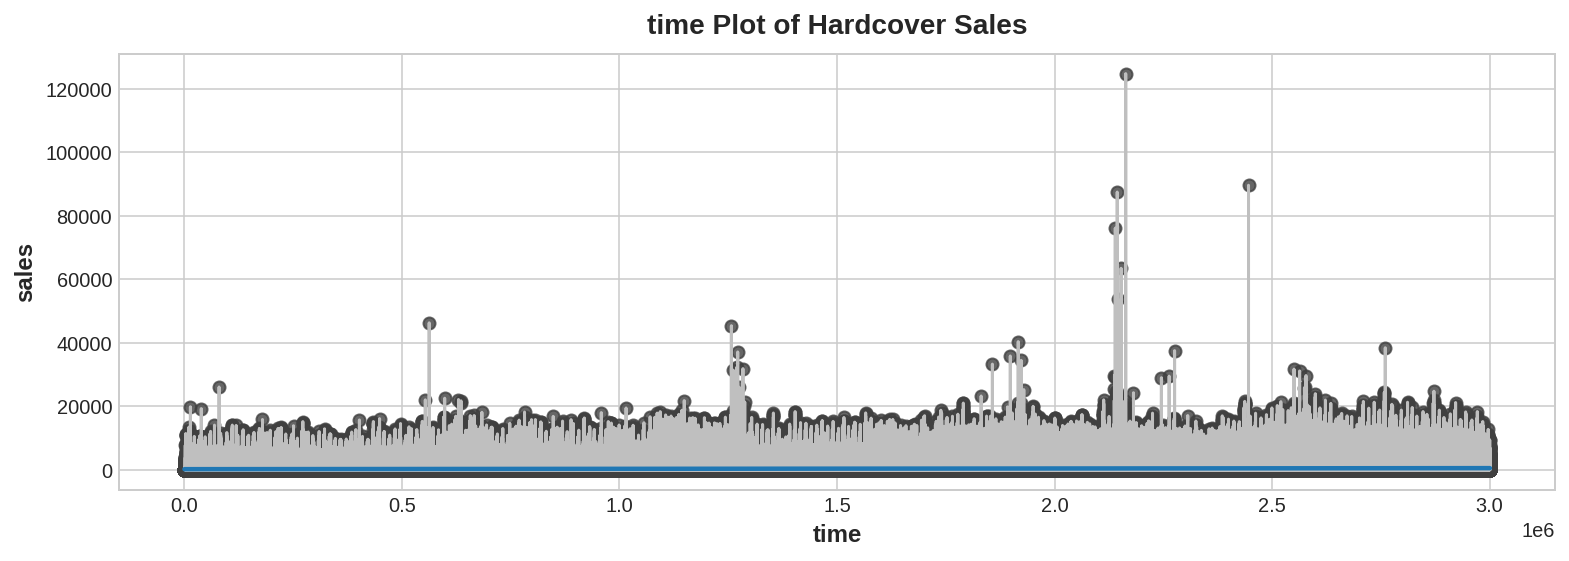

In [6]:

fig, ax = plt.subplots()
ax.plot('time', 'sales', data=train, color='0.75')
ax = sns.regplot(x='time', y='sales', data=train, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('time Plot of Hardcover Sales');

In [7]:
train.describe()

,store_nbr,sales,onpromotion,time
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,2.750000e+01,3.577757e+02,2.602770e+00,1.500444e+06
std,1.558579e+01,1.101998e+03,1.221888e+01,8.662819e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+01,0.000000e+00,0.000000e+00,7.502218e+05
50%,2.750000e+01,1.100000e+01,0.000000e+00,1.500444e+06
75%,4.100000e+01,1.958473e+02,0.000000e+00,2.250665e+06
max,5.400000e+01,1.247170e+05,7.410000e+02,3.000887e+06


In [8]:
train.tail(100)

,date,store_nbr,family,sales,onpromotion,time
id,,,,,,
3000788,2017-08-15,6,SEAFOOD,47.575,0,3000788
3000789,2017-08-15,7,AUTOMOTIVE,5.000,0,3000789
3000790,2017-08-15,7,BABY CARE,0.000,0,3000790
3000791,2017-08-15,7,BEAUTY,11.000,2,3000791
3000792,2017-08-15,7,BEVERAGES,3999.000,9,3000792
...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0,3000883
3000884,2017-08-15,9,PREPARED FOODS,154.553,1,3000884
3000885,2017-08-15,9,PRODUCE,2419.729,148,3000885
